### 1. EM算法求解GMM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from utils import plot_mixture

In [2]:
# 1. 生成数据
mu = np.array([-1,4])
std = np.array([1,1.5])
w = np.array([0.7,0.3])
N = 3000
# 2. 采样
Y = []
Z = []
for j in range(N):
    cls = np.random.choice(len(w), p=w)
    y_j = np.random.normal(loc=mu[cls],scale=std[cls])
    Y.append(y_j)
Y = np.array(Y)

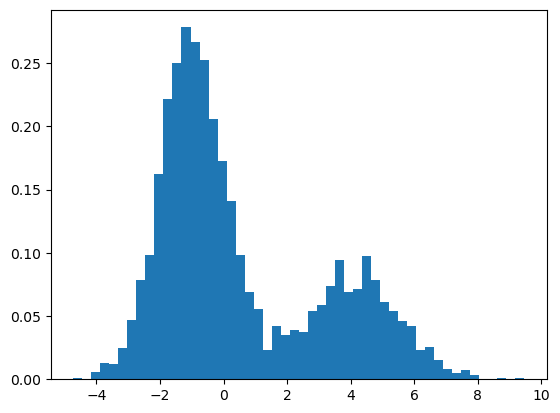

In [3]:
plt.hist(Y, bins=50, density=True)
plt.show()

In [4]:
# 3. EM
# (1) 初始化
mu0 = np.random.choice(Y, size=len(w))
std0 = np.array([1,1])
w0 = np.array([0.5,0.5])
for iter in range(30):
    print(f'Iteration {iter}: μ1 = {mu0[0]:.3f}, σ1 = {std0[0]:.3f}, μ2 = {mu0[1]:.3f}, σ2 = {std0[1]:.3f}, '  
              f'w1 = {w0[0]:.3f}, w2 = {w0[1]:.3f}') 
    # (2) E-step
    responsibility = []
    for k in range(len(w0)):
        responsibility.append(norm(mu0[k], std0[k]).pdf(Y) * w0[k])
    norm_responsibility = np.array(responsibility)/np.sum(responsibility, axis=0) # shape: (k, N)
    # (3) M-step
    mu_new = []
    std_new = []
    w_new = []
    for k_m in range(len(w0)):
        mu_k = np.sum(norm_responsibility[k_m,:]*Y)/np.sum(norm_responsibility[k_m,:])
        std_k = np.sqrt(np.sum(norm_responsibility[k_m,:]*(Y-mu_k)**2)/np.sum(norm_responsibility[k_m,:]))
        w_k = np.sum(norm_responsibility[k_m,:])/N
        mu_new.append(mu_k)
        std_new.append(std_k)
        w_new.append(w_k)
    mu_new = np.array(mu_new)
    std_new = np.array(std_new)
    w_new = np.array(w_new)
    # (4) 更新
    mu0 = mu_new
    std0 = std_new
    w0 = w_new



Iteration 0: μ1 = -1.099, σ1 = 1.000, μ2 = -0.250, σ2 = 1.000, w1 = 0.500, w2 = 0.500
Iteration 1: μ1 = -1.228, σ1 = 1.134, μ2 = 1.725, σ2 = 2.643, w1 = 0.398, w2 = 0.602
Iteration 2: μ1 = -1.167, σ1 = 0.909, μ2 = 1.960, σ2 = 2.704, w1 = 0.451, w2 = 0.549
Iteration 3: μ1 = -1.151, σ1 = 0.850, μ2 = 2.185, σ2 = 2.684, w1 = 0.490, w2 = 0.510
Iteration 4: μ1 = -1.145, σ1 = 0.842, μ2 = 2.354, σ2 = 2.644, w1 = 0.516, w2 = 0.484
Iteration 5: μ1 = -1.142, σ1 = 0.850, μ2 = 2.488, σ2 = 2.598, w1 = 0.534, w2 = 0.466
Iteration 6: μ1 = -1.139, σ1 = 0.863, μ2 = 2.606, σ2 = 2.548, w1 = 0.549, w2 = 0.451
Iteration 7: μ1 = -1.136, σ1 = 0.877, μ2 = 2.717, σ2 = 2.494, w1 = 0.563, w2 = 0.437
Iteration 8: μ1 = -1.133, σ1 = 0.890, μ2 = 2.825, σ2 = 2.436, w1 = 0.575, w2 = 0.425
Iteration 9: μ1 = -1.130, σ1 = 0.902, μ2 = 2.932, σ2 = 2.374, w1 = 0.587, w2 = 0.413
Iteration 10: μ1 = -1.125, σ1 = 0.914, μ2 = 3.041, σ2 = 2.305, w1 = 0.598, w2 = 0.402
Iteration 11: μ1 = -1.120, σ1 = 0.924, μ2 = 3.151, σ2 = 2.231, 

/Users/cheung/anaconda3/envs/RL_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


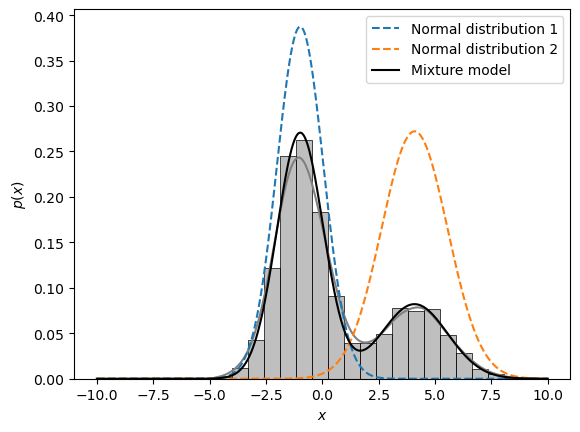

In [5]:
import seaborn as sns
def plot_mixture(x, mean1, std1, mean2, std2, w1, w2): 
    # Plot an histogram of the input data 
    sns.histplot(x, bins=20, kde=True, stat='density', linewidth=0.5, color='gray') 
 
    # Generate points for the x-axis 
    x_ = np.linspace(-10, 10, 1000) 
 
    # Calculate the individual nomral distributions 
    normal1 = norm.pdf(x_, mean1, std1) 
    normal2 = norm.pdf(x_, mean2, std2) 
 
    # Calculate the mixture 
    mixture = w1 * normal1 + w2 * normal2 
 
    # Plot the results 
    plt.plot(x_, normal1, label='Normal distribution 1', linestyle='--') 
    plt.plot(x_, normal2, label='Normal distribution 2', linestyle='--') 
    plt.plot(x_, mixture, label='Mixture model', color='black') 
    plt.xlabel('$x$') 
    plt.ylabel('$p(x)$') 
    plt.legend() 
plot_mixture(Y, mu0[0], std0[0], mu0[1], std0[1], w0[0], w0[1])

## 2. GMM的生成与采样

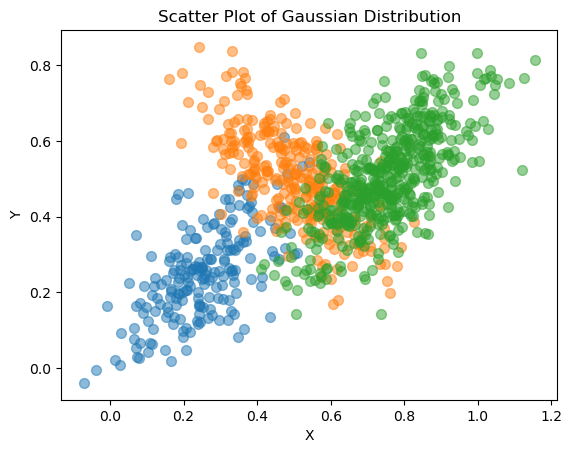

In [6]:
# 生成二维高斯分布N
mu_1 = np.array([0.25, 0.25])  # 均值
sigma_1 = np.array([[0.015, 0.01], [0.01, 0.015]])  # 协方差矩阵
N_1 = np.random.multivariate_normal(mu_1, sigma_1, size=200)

mu_2 = np.array([0.5, 0.5])  # 均值
sigma_2 = np.array([[0.015, -0.01], [-0.01, 0.015]])  # 协方差矩阵
N_2 = np.random.multivariate_normal(mu_2, sigma_2, size=300)

mu_3 = np.array([0.75, 0.5])  # 均值
sigma_3 = np.array([[0.015, 0.01], [0.01, 0.015]])  # 协方差矩阵
N_3 = np.random.multivariate_normal(mu_3, sigma_3, size=500)
# 绘制散布图
plt.scatter(N_1[:, 0], N_1[:, 1], s=50, alpha=0.5)
plt.scatter(N_2[:, 0], N_2[:, 1], s=50, alpha=0.5)
plt.scatter(N_3[:, 0], N_3[:, 1], s=50, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Gaussian Distribution')
# 显示图像
plt.show()

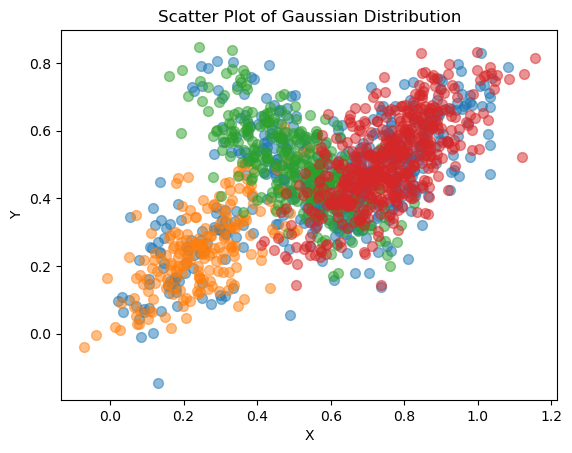

In [7]:
sample_x = []
for i in range(500):
    sample_z = np.random.choice([1, 2, 3], p=[0.2, 0.3, 0.5])
    if sample_z == 1:
        sample_x.append(np.random.multivariate_normal(mu_1, sigma_1))
    elif sample_z == 2:
        sample_x.append(np.random.multivariate_normal(mu_2, sigma_2))
    else:
        sample_x.append(np.random.multivariate_normal(mu_3, sigma_3))

sample_x = np.array(sample_x)
plt.scatter(sample_x[:, 0], sample_x[:, 1], s=50, alpha=0.5)
# 绘制散布图
plt.scatter(N_1[:, 0], N_1[:, 1], s=50, alpha=0.5)
plt.scatter(N_2[:, 0], N_2[:, 1], s=50, alpha=0.5)
plt.scatter(N_3[:, 0], N_3[:, 1], s=50, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Gaussian Distribution')
# 显示图像
plt.show()